In [ ]:
# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the CSV file

In [3]:
df = pd.read_csv(r"C:\Users\hp\Downloads\top10s.csv",encoding='ISO-8859-1')

In [4]:
df.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
# Droping the unnamed column

In [6]:
df.drop(["Unnamed: 0"], axis = 1, inplace = True)

In [7]:
df.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
# Renaming the columns to make sense to the reader

In [8]:
df.rename(columns={"top genre":"top_genre","nrgy":"energy", "dnce":"dance", "dB":"loudness", "val":"valence", "dur":"duration", "acous":"acoustic", "spch":"speech", "pop":"popularity"}, inplace = True)

In [9]:
df.head()

,title,artist,top_genre,year,bpm,energy,dance,loudness,live,valence,duration,acoustic,speech,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
# Checking if there are any null values in the data frame

In [10]:
df.isnull().sum()

title         0
artist        0
top_genre     0
year          0
bpm           0
energy        0
dance         0
loudness      0
live          0
valence       0
duration      0
acoustic      0
speech        0
popularity    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       603 non-null    object
 1   artist      603 non-null    object
 2   top_genre   603 non-null    object
 3   year        603 non-null    int64 
 4   bpm         603 non-null    int64 
 5   energy      603 non-null    int64 
 6   dance       603 non-null    int64 
 7   loudness    603 non-null    int64 
 8   live        603 non-null    int64 
 9   valence     603 non-null    int64 
 10  duration    603 non-null    int64 
 11  acoustic    603 non-null    int64 
 12  speech      603 non-null    int64 
 13  popularity  603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 66.1+ KB


In [ ]:
# Calculating some basic statistics from the data

In [12]:
df.describe()

,year,bpm,energy,dance,loudness,live,valence,duration,acoustic,speech,popularity
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,2014.592040,118.545605,70.504146,64.379768,-5.578773,17.774461,52.225539,224.674959,14.326700,8.358209,66.520730
std,2.607057,24.795358,16.310664,13.378718,2.798020,13.102543,22.513020,34.130059,20.766165,7.483162,14.517746
min,2010.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,134.000000,0.000000,0.000000,0.000000
25%,2013.000000,100.000000,61.000000,57.000000,-6.000000,9.000000,35.000000,202.000000,2.000000,4.000000,60.000000
50%,2015.000000,120.000000,74.000000,66.000000,-5.000000,12.000000,52.000000,221.000000,6.000000,5.000000,69.000000
75%,2017.000000,129.000000,82.000000,73.000000,-4.000000,24.000000,69.000000,239.500000,17.000000,9.000000,76.000000
max,2019.000000,206.000000,98.000000,97.000000,-2.000000,74.000000,98.000000,424.000000,99.000000,48.000000,99.000000


In [ ]:
# Finding Correlation between different aspects of the song

Text(0.5, 1.0, 'Correlation between Features')

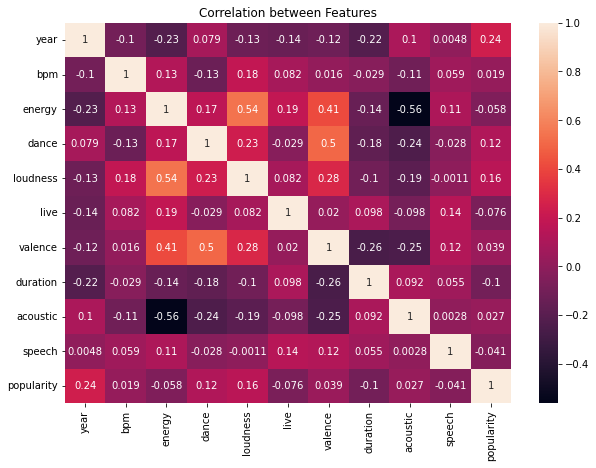

In [15]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(), annot=True)
plt.title("Correlation between Features")

In [28]:
top_10_correlated = df.corr().unstack().sort_values(ascending=False).drop_duplicates()[1:11]

In [ ]:
# Top 10 Correlated features

In [29]:
top_10_correlated

energy      loudness      0.537528
valence     dance         0.501696
            energy        0.409577
            loudness      0.282922
popularity  year          0.241261
dance       loudness      0.233170
live        energy        0.186738
bpm         loudness      0.183870
energy      dance         0.167209
loudness    popularity    0.156897
dtype: float64

In [ ]:
# Energy and loudness have the highest correlation which makes sense because louder songs usually brings more energy
# Even valence and dance has a higher positive correlation because usually dance songs have a positive energy

In [ ]:
# Finding highest number of Songs per Year

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Songs Per Year')

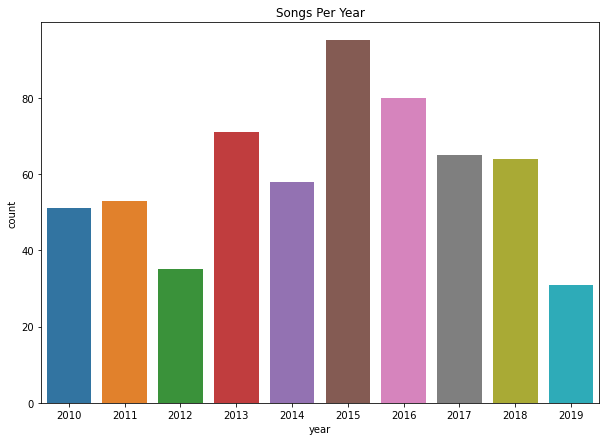

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(df["year"])
plt.title("Songs Per Year")

In [ ]:
# Year 2015 and 2016 have the highest number of Songs

In [ ]:
# Checking correlation between features using Scatter Plot

Text(0.5, 1.0, 'Energy and Loudness Relationship')

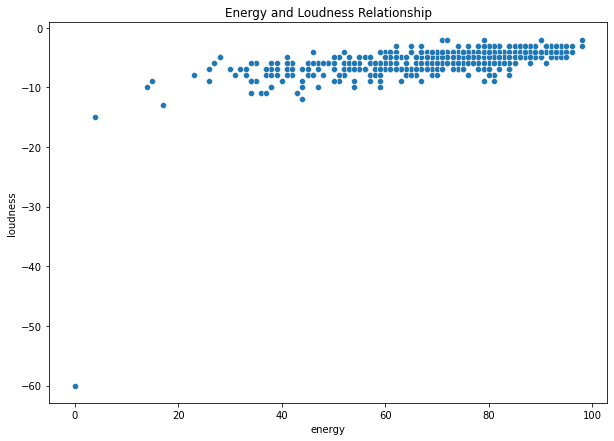

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="energy",y="loudness",data=df)
plt.title("Energy and Loudness Relationship")

Text(0.5, 1.0, 'Valence and Dance Relationship')

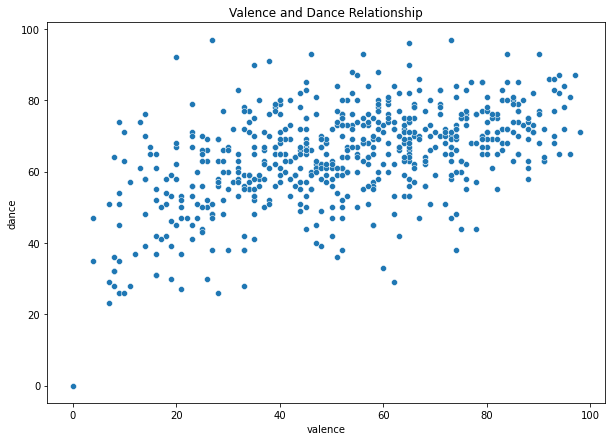

In [40]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="valence",y="dance",data=df)
plt.title("Valence and Dance Relationship")

Text(0.5, 1.0, 'Energy and Acoustic Relationship')

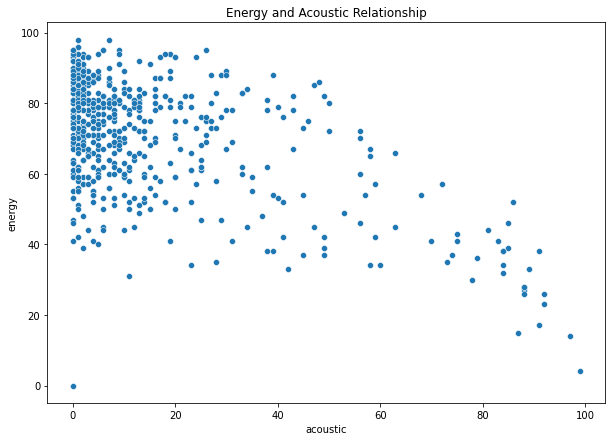

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="acoustic",y="energy",data=df)
plt.title("Energy and Acoustic Relationship")

In [ ]:
# Finding Top 10 Genres with highest number of Songs

In [91]:
top_genre1 = df["top_genre"].value_counts().sort_values(ascending=False).reset_index()[0:10]

In [92]:
top_genre1

,index,top_genre
0,dance pop,327
1,pop,60
2,canadian pop,34
3,barbadian pop,15
4,boy band,15
5,electropop,13
6,british soul,11
7,big room,10
8,canadian contemporary r&b,9
9,neo mellow,9


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'dance pop'),
  Text(1, 0, 'pop'),
  Text(2, 0, 'canadian pop'),
  Text(3, 0, 'barbadian pop'),
  Text(4, 0, 'boy band'),
  Text(5, 0, 'electropop'),
  Text(6, 0, 'british soul'),
  Text(7, 0, 'big room'),
  Text(8, 0, 'canadian contemporary r&b'),
  Text(9, 0, 'neo mellow')])

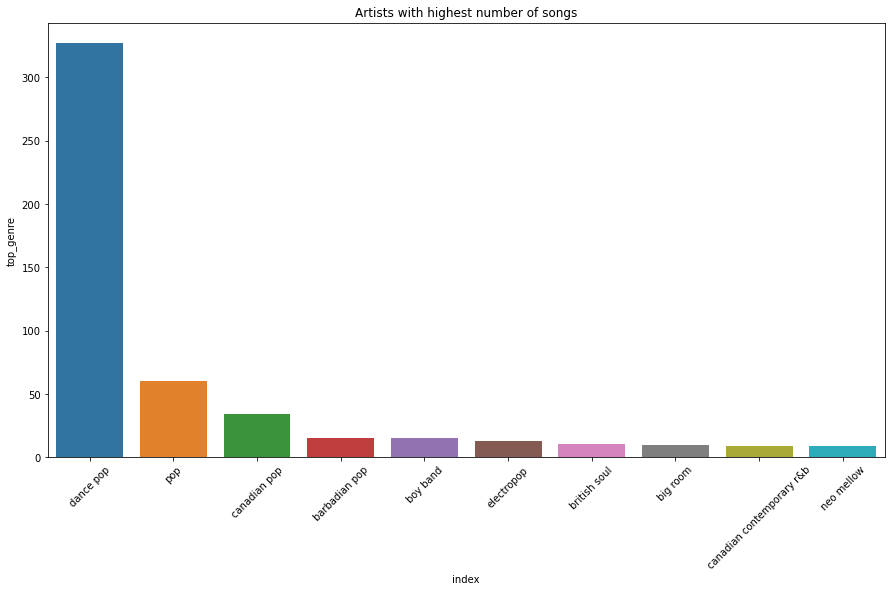

In [94]:
plt.figure(figsize=(15,8))
sns.barplot(x="index",y="top_genre",data=top_genre1)
plt.title("Artists with highest number of songs")
plt.xticks(rotation=45)

In [ ]:
# Dance Pop genre has the highest number of songs

In [ ]:
# Finding Top 10 Most Popular Genres

In [69]:
top_genre = df.groupby(["top_genre"])["popularity"].mean().sort_values(ascending=False).reset_index()[0:10]

In [70]:
top_genre

,top_genre,popularity
0,escape room,90.000000
1,brostep,86.000000
2,alternative r&b,84.000000
3,irish singer-songwriter,81.000000
4,danish pop,80.000000
5,celtic rock,80.000000
6,electronic trap,79.500000
7,edm,78.200000
8,canadian contemporary r&b,77.666667
9,electropop,77.461538


Text(0.5, 1.0, 'Top genres based on mean popuarity')

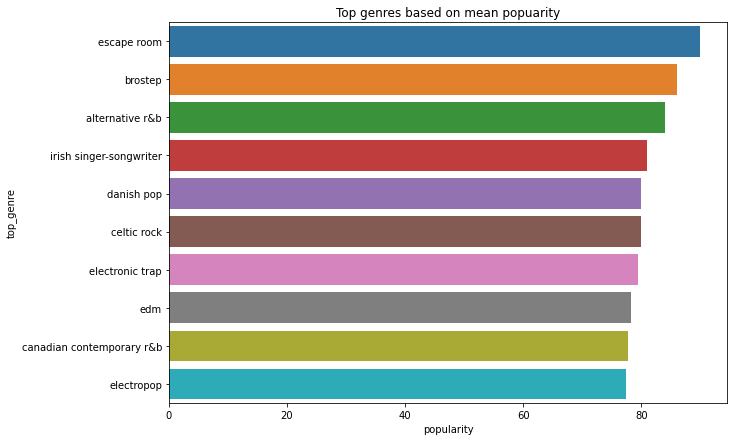

In [71]:
plt.figure(figsize = (10, 7))
sns.barplot(y='top_genre', x="popularity", data=top_genre)
plt.title("Top genres based on mean popuarity")

In [ ]:
# Most Popular Genre is Escape Room followed by BroStep and Alernative R&B

In [ ]:
# Finding average duration of most liked songs

# We will sort thw whole Table with reference to Popularity (High to Low) and then will calculate the Mean of the duration

In [72]:
df.sort_values(by="popularity", ascending=False)["duration"].mean()

224.67495854063017

In [73]:
df.sort_values(by="popularity", ascending=False)["duration"].median()

221.0

In [ ]:
# Since there is no significant difference between mean and median
# So average duration of most popular songs is 224 minutes i.e 3.5 to 4 minutes

In [ ]:
#Finding Artists with Highest number of Songs in Top Chart List

In [82]:
top_artist = df["artist"].value_counts().sort_values(ascending=False).reset_index()[0:10]

In [83]:
top_artist

,index,artist
0,Katy Perry,17
1,Justin Bieber,16
2,Rihanna,15
3,Maroon 5,15
4,Lady Gaga,14
5,Bruno Mars,13
6,Shawn Mendes,11
7,Pitbull,11
8,Ed Sheeran,11
9,The Chainsmokers,11


Text(0.5, 1.0, 'Artists with highest number of songs')

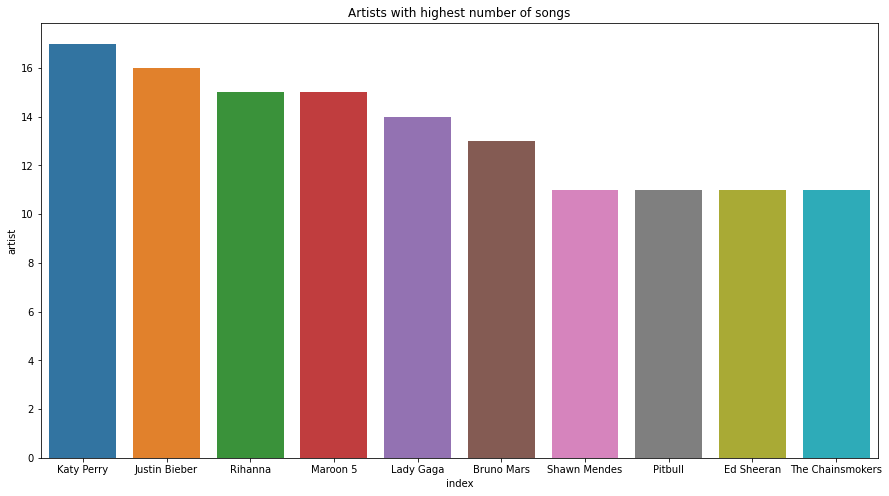

In [87]:
plt.figure(figsize=(15,8))
sns.barplot(x="index",y="artist",data=top_artist)
plt.title("Artists with highest number of songs")

In [ ]:
# So, Katy Perry has the highest number of songs in Top Chart List